2)Create a model for extracting handwritten texts from an image.
For model creation you can use the open source dataset of handwritten texts (like NIST) from Kaggle, git etc.
If you are referring to any GitHub, Kaggle or blog, you have to site the same in Notebook. 
In the end, please write the parameter tuning techniques you will apply for improving the accuracy of the model.

Here i have tryed with 2 methods 
1)using pytesseract: we an exract the words from the image easily.

In [ ]:
# !sudo apt install tesseract-ocr
# !pip install pytesseract

In [ ]:
from PIL import Image
from pytesseract import pytesseract

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
im = cv2.imread("/content/drive/MyDrive/text_extraction/sample-text.jpg", cv2.IMREAD_COLOR)

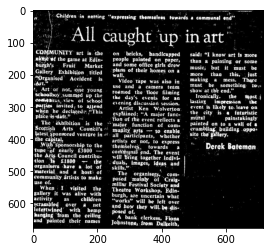

In [ ]:
im = cv2.bitwise_not(im)
plt.imshow(im)
plt.show()

In [ ]:
image_path="/content/drive/MyDrive/text_extraction/sample-text.jpg"
extract = pytesseract.image_to_string(Image.open(image_path))
print(extract)
#type(extract)

 

Gallery Exhibition _ titled
“Organised” Accident is
ist.” én.
t, Axt’ or not, -qne young
Schoolboy summed up the
eemreasus, view of school
igs invited, to ajyend
when te declared: "This
placeis-datt.”
The ‘ &hibition is
Scottish Arts
latest Spongored ventitre in
the capital,
Wigh"sponsorship to the
‘tupe of nearly £3000 —
‘the Arts. Council contribu.
tion} £1800 the
organisers -have a lot of
‘materigl_and a host: of
community artists to make
use of. Z
When 1 visited the
gallery it was alive with
activity as children
scrambled over a net
intertwined’ with hemp
hanging “from the ceiling
and ‘painted their names

  

 

 
  

 

the

‘Children ‘in netting “expressing

 
 
 

Countil’s »

on bricks, handicapped
people painted on paper,
and some office girls drew
plans of their homes on a
wall.

Video tape was also in
use and a camera team
roamed the floor filming
the day’s events for an
evening discussion session,

Artist Ken Wolverton
xpidined: “A major func-
tion of the event reflects

In [ ]:
extract=''.join(extract)
type(extract)

str

In [ ]:
extract=extract.split('\n')

extract

[' ',
 '',
 'Gallery Exhibition _ titled',
 '“Organised” Accident is',
 'ist.” én.',
 't, Axt’ or not, -qne young',
 'Schoolboy summed up the',
 'eemreasus, view of school',
 'igs invited, to ajyend',
 'when te declared: "This',
 'placeis-datt.”',
 'The ‘ &hibition is',
 'Scottish Arts',
 'latest Spongored ventitre in',
 'the capital,',
 'Wigh"sponsorship to the',
 '‘tupe of nearly £3000 —',
 '‘the Arts. Council contribu.',
 'tion} £1800 the',
 'organisers -have a lot of',
 '‘materigl_and a host: of',
 'community artists to make',
 'use of. Z',
 'When 1 visited the',
 'gallery it was alive with',
 'activity as children',
 'scrambled over a net',
 'intertwined’ with hemp',
 'hanging “from the ceiling',
 'and ‘painted their names',
 '',
 '  ',
 '',
 ' ',
 '',
 ' ',
 '  ',
 '',
 ' ',
 '',
 'the',
 '',
 '‘Children ‘in netting “expressing',
 '',
 ' ',
 ' ',
 ' ',
 '',
 'Countil’s »',
 '',
 'on bricks, handicapped',
 'people painted on paper,',
 'and some office girls drew',
 'plans of their

Next section i tried with hand written character recgnition, 

2)here i tryed to perform Handwritten character recognition using EMNIST data, s a set of handwritten character digits derived from the NIST Special Database 19. Each image in this dataset has a dimension of 28x28.

Here the split has train and test data for 47 classes. The balanced split has a more uniform distribution of the classes (~2400 images for each class). Each row in the data represents an image. The first column is the label, and the remaining 784 columns correspond to the reshaped image. There are a total of 112799 train images and 18799 test images

In [ ]:
# pip install keras
# pip install tensorflow

In [ ]:
# !unzip "/content/drive/MyDrive/text_extraction/test.csv.zip" -d  "/content/drive/MyDrive/text_extraction/dataset/test.csv"

In [ ]:
# Import modules
import numpy as np
import pandas as pd
from keras.utils import np_utils

In [ ]:
# Read data from CSV files
train = pd.read_csv("/content/drive/MyDrive/text_extraction/dataset/train.csv",delimiter = ',')
test = pd.read_csv("/content/drive/MyDrive/text_extraction/dataset/test.csv", delimiter = ',')


In [ ]:
train

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# classmap is a map that goes from the label to the actual character
classmap = pd.read_csv("/content/drive/MyDrive/text_extraction//dataset/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None, squeeze=True)


In [ ]:
# Split features and labels
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]
test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]

In [ ]:
del train
del test

train_x = np.asarray(train_x)
test_x = np.asarray(test_x)

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 784)
Test data feature shape:  (18799, 784)
Train data label shape:  (112799,)
Test data label shape:  (18799,)


In [ ]:
# Let us define a function to preprocess the image and then apply this function to every row of our data
# This function reshapes the image into 28x28, flips it and rotates it by 90 degrees
def preprocess_image(input_iname):
    input_iname = input_iname.reshape([28,28])
    input_iname = np.fliplr(input_iname)
    input_iname = np.rot90(input_iname)
    return input_iname

train_x = np.apply_along_axis(preprocess_image, 1, train_x)
test_x = np.apply_along_axis(preprocess_image, 1, test_x)

# We normalize the image so that the pixel intensities are between 0 and 1
train_x = train_x.astype('float32')
train_x /= 255
test_x = test_x.astype('float32')
test_x /= 255

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 28, 28)
Test data feature shape:  (18799, 28, 28)
Train data label shape:  (112799,)
Test data label shape:  (18799,)


Let us first take a look at some same images for the 47 labels

The target labels are ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']


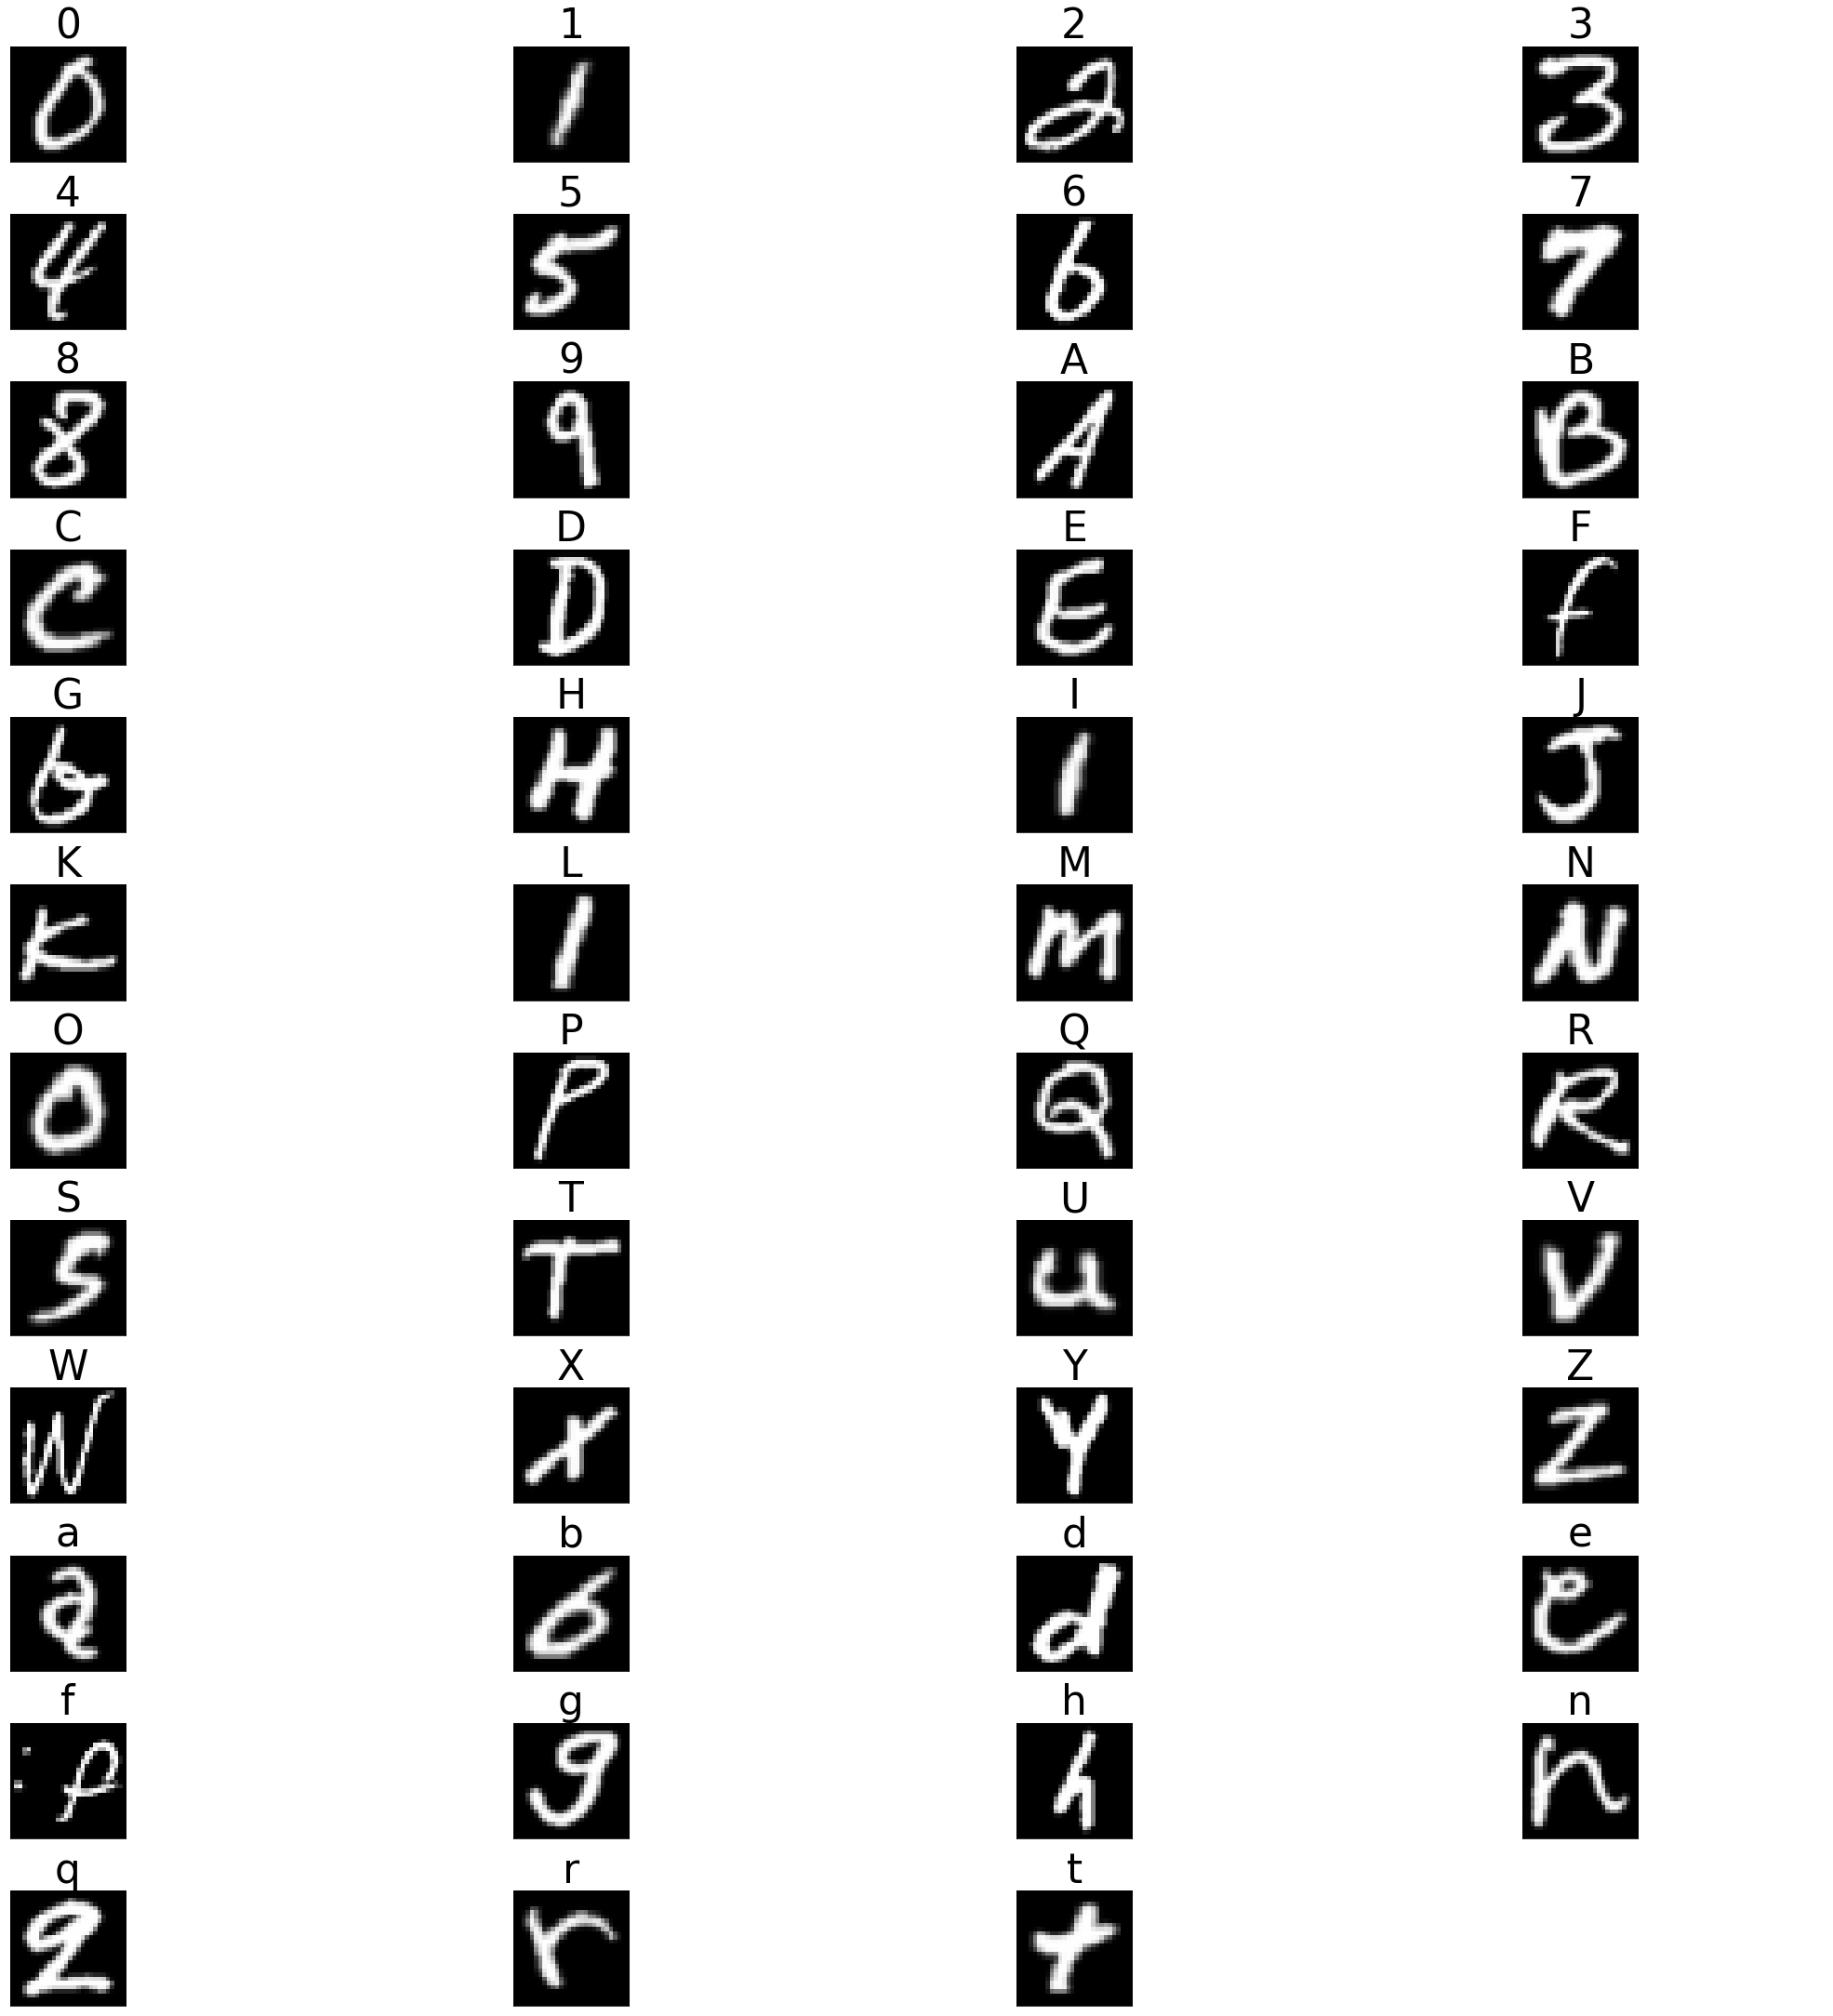

In [ ]:
import random
import matplotlib.pyplot as plt
labels = list(map(chr, list(classmap.values)))
print(f'The target labels are {labels}')

fig, axs = plt.subplots(12,4, constrained_layout=True, figsize=(30,30))
count = 0

for ax in axs.flat:
    if count < 47:
        idx = np.where(train_y == count)
        random_index = random.sample(list(idx), 1)
        image = train_x[random_index[0][0],:]
        ax.imshow(image, cmap=plt.get_cmap('gray'))
        ax.set_title(chr(classmap[count]), fontsize=44)
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.axis('off')
    count += 1   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, 'A'),
 Text(0, 0, 'B'),
 Text(0, 0, 'C'),
 Text(0, 0, 'D'),
 Text(0, 0, 'E'),
 Text(0, 0, 'F'),
 Text(0, 0, 'G'),
 Text(0, 0, 'H'),
 Text(0, 0, 'I'),
 Text(0, 0, 'J'),
 Text(0, 0, 'K'),
 Text(0, 0, 'L'),
 Text(0, 0, 'M'),
 Text(0, 0, 'N'),
 Text(0, 0, 'O'),
 Text(0, 0, 'P'),
 Text(0, 0, 'Q'),
 Text(0, 0, 'R'),
 Text(0, 0, 'S'),
 Text(0, 0, 'T'),
 Text(0, 0, 'U'),
 Text(0, 0, 'V'),
 Text(0, 0, 'W'),
 Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'Z'),
 Text(0, 0, 'a'),
 Text(0, 0, 'b'),
 Text(0, 0, 'd'),
 Text(0, 0, 'e'),
 Text(0, 0, 'f'),
 Text(0, 0, 'g'),
 Text(0, 0, 'h'),
 Text(0, 0, 'n'),
 Text(0, 0, 'q'),
 Text(0, 0, 'r'),
 Text(0, 0, 't')]

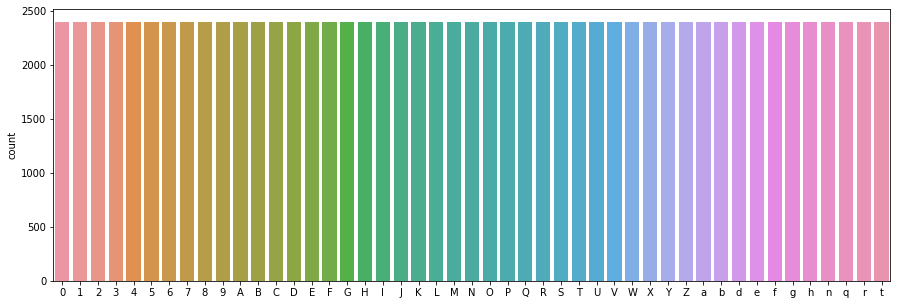

In [ ]:
import seaborn as sns
fig = plt.gcf()
fig.set_figwidth(15)
fig.set_figheight(5)
ax = sns.countplot(train_y.values)
ax.set_xticklabels(labels)

Let's now look at the distirbution of pixel intensities in a few sample images. Note that we are working with black and white images. So, the pixel intensity is between 0 and 1.

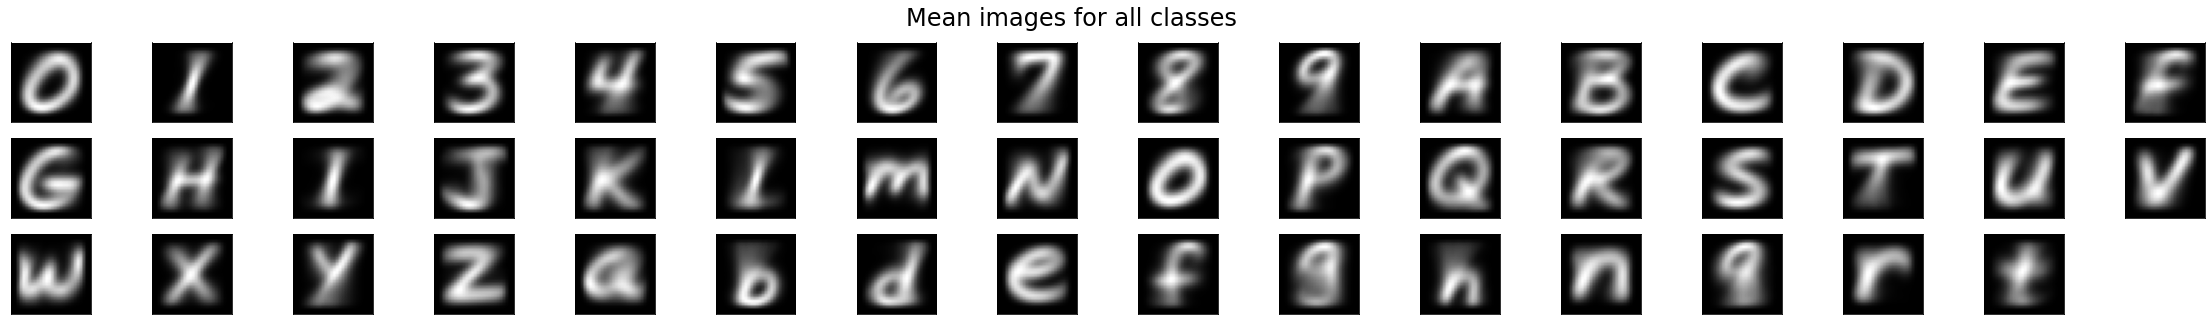

In [ ]:
# Let's compute the average image for each class and plot it
import numpy as np
mean_images = np.empty(shape=(len(classes), 28,28), dtype=np.float32)
for iter in range(0, len(classes)):
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    mean_images[iter]= np.average(t,axis=0)

fig=plt.figure(figsize=(40,5))
fig.suptitle('Mean images for all classes', fontsize=24)
fig.tight_layout() 

for i in range(1,len(classes)+1):
    ax=fig.add_subplot(3,16,i) 
    ax.imshow(mean_images[i-1], cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])

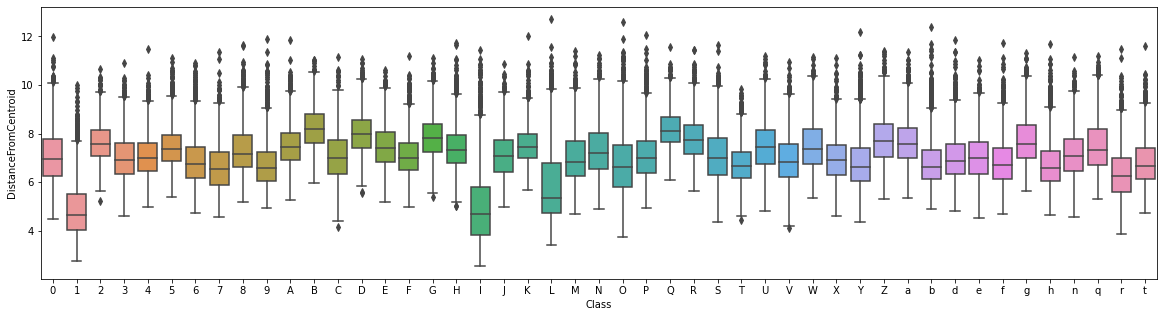

In [ ]:
# Let us find out how training images in each class vary from the average image
import seaborn as sns
import numpy as np
import pandas as pd
import numpy.matlib

def euclidDistance(im1, im2):
    # computes eucliden distance between 2 images
    return (np.sum((im1-im2)**2))**0.5

df = pd.DataFrame()

# We first compute the euclidean distance of each image from its mean
for iter in range(0, len(classes)):
    count += 1
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    train_x_dist_from_mean = np.empty(shape=(len(t), 1), dtype=np.float32) 
    df_temp = pd.DataFrame()
    cls = np.matlib.repmat(chr(classmap[iter]), len(t), 1)
    for iter1 in range(0, len(t)):
        train_x_dist_from_mean[iter1] = euclidDistance(t[iter1], mean_images[iter])
    df_temp['Class'] = cls.tolist()
    df_temp['DistanceFromCentroid'] = train_x_dist_from_mean.tolist()
    df_temp['Train_image_idx'] = sample_image_idx
    df = pd.concat([df, df_temp])
    
# We then use a box plot to visualize this
df = df.explode("DistanceFromCentroid")
df = df.explode("Class")
plt.rcParams["figure.figsize"] = (20, 5)
ax = sns.boxplot(x="Class", y="DistanceFromCentroid", data=df)

Some digits like 0, 2 and some alphabets like O have high variability because we can see that, on an average, the samples are at greater distance from the centroid. 1 and I have low variability and we can see that they are closer to their mean.

There are many outliers. We can visualize examples of these outliers to figure out why they are at a great distance from the mean image.

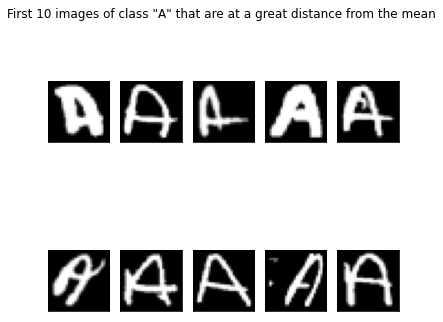

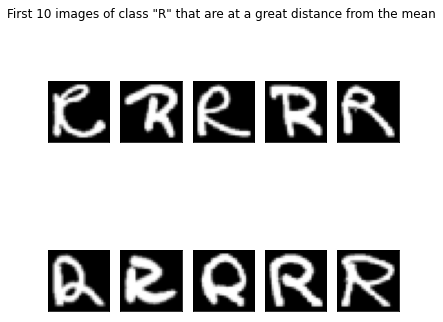

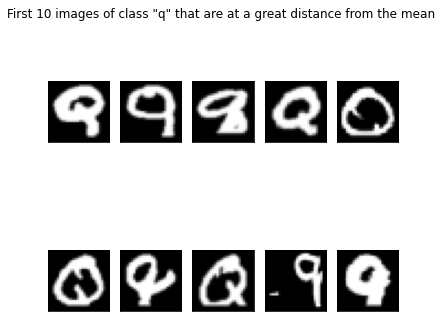

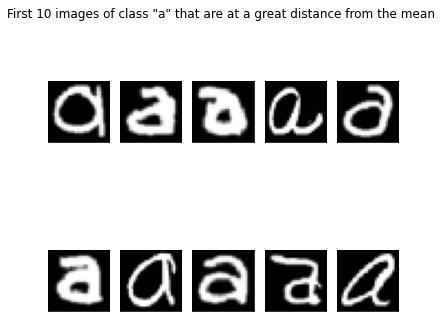

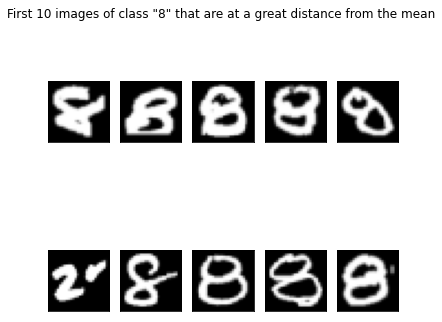

In [ ]:
# Let us sort the distance in decending order and look at the images which were far away from the mean. 
# We will do this for 5 randomly selected classes
import random

# Pick 5 random classes
random_cls_index = random.sample(classes, 5)

for iter in random_cls_index:
    sample_image_idx = train_y.index[train_y == iter].tolist()
    t = train_x[sample_image_idx]
    df_temp = df[df.Class == chr(classmap[iter])]
    idx = df_temp.sort_values(by=['DistanceFromCentroid'], ascending=False).index
    count = 0
    fig, axs = plt.subplots(2, 5, constrained_layout=True, figsize=(5,5))
    fig.suptitle(f'First 10 images of class "{chr(classmap[iter])}" that are at a great distance from the mean')
    for ax in axs.flat:
        ax.imshow(t[idx[count]], cmap=plt.get_cmap('gray'))
        ax.set_xticks([])
        ax.set_yticks([])
        count += 1

Train data feature shape:  (112799, 784)
Train data label shape:  (112799,)
Shape of X:  (9700, 784)


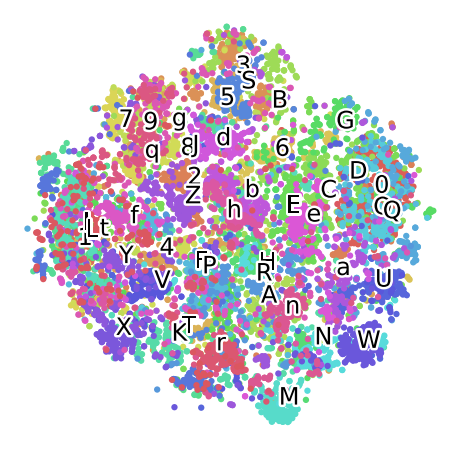

In [ ]:

train_x = train_x.reshape(len(train_x),-1)

print("Train data feature shape: ", train_x.shape)
print("Train data label shape: ", train_y.shape)

# let's pick 200 images from each class and concatenate the results
idx = np.where(train_y == 0)
random_index = random.sample(list(idx[0]), 500)
X = train_x[random_index,:]
Y = train_y[random_index]


for iter in range(1, 47):
    idx = np.where(train_y == iter)
    random_index = random.sample(list(idx[0]), 200)
    X = np.vstack((X,train_x[random_index,:]))
    Y = np.hstack((Y, train_y[random_index]))
print("Shape of X: ", X.shape)
    
# We apply t-SNE on this simplified data
from sklearn import manifold
tsne = manifold.TSNE(n_components=2, init='pca', random_state=1200)
X_tsne = tsne.fit_transform(X)

# Let's us plot the data
import seaborn as sns
import matplotlib.patheffects as PathEffects

def plot_data(x, colors, classmap):
    # Choose color palette for 47 classes
    palette = np.array(sns.color_palette("hls", 47))

    # Create a scatter plot
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(47):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, chr(classmap[i]), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
plot_data(X_tsne, Y, classmap)

MODELING

In [ ]:
# Reshape training data
def reshape_image(input_image):
    input_image = input_image.reshape([28,28])
    return input_image

train_x = np.apply_along_axis(reshape_image, 1, train_x)

# Preprocess data for CNN
num_classes = train_y.nunique()

# One hot encoding of labels 
train_y = np_utils.to_categorical(train_y, num_classes)
test_y = np_utils.to_categorical(test_y, num_classes)


# Reshape image for CNN (Requires 4D input -> (batch size, height, width, depth))
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print("Train data feature shape: ", train_x.shape)
print("Test data feature shape: ", test_x.shape)
print("Train data label shape: ", train_y.shape)
print("Test data label shape: ", test_y.shape)

Train data feature shape:  (112799, 28, 28, 1)
Test data feature shape:  (18799, 28, 28, 1)
Train data label shape:  (112799, 47)
Test data label shape:  (18799, 47)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

      
def build_model():
    model = Sequential()
    # Add a convolution layer with 32 filters
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))  
    model.add(MaxPooling2D(pool_size=2))
    # Add a second convolution layer
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))          
    model.add(MaxPooling2D(pool_size=2))        
    model.add(Flatten())
    # First fully connected layer with 128 units
    model.add(Dense(units=128, activation='relu'))
    # Output layer with 47 units
    model.add(Dense(units=47, activation='softmax')) 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [ ]:
# Let's print a description of our model
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 47)                6

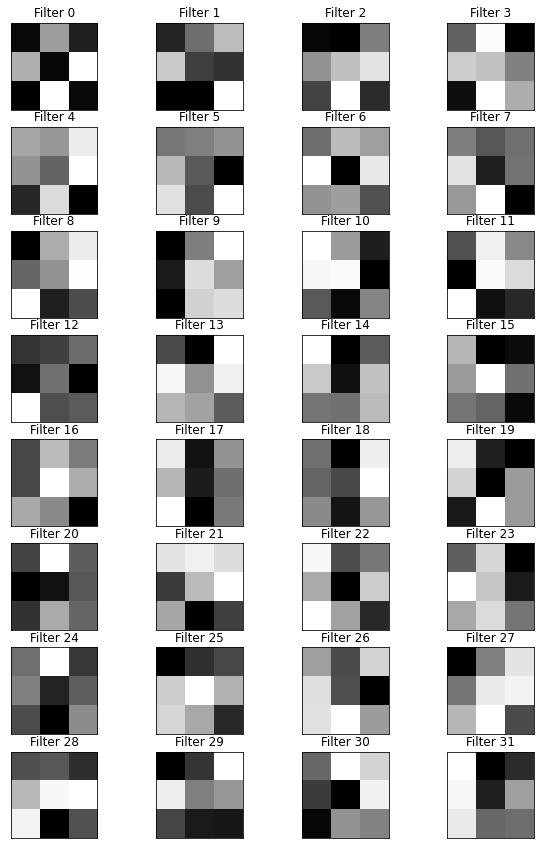

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# retrieve weights from the first input layer
filters, biases = model.layers[0].get_weights()

fig=plt.figure()
fig = plt.gcf()
fig.set_figwidth(10)
fig.set_figheight(15)

# Visualizing filters in first layer
for i in range(0,32):
    ax=fig.add_subplot(8,4,i+1) 
    f = filters[:, :, :, i]
    ax.imshow(f[:, :, 0], cmap=plt.get_cmap('gray'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Filter {i}')

Next, we will look at the output of applying the first convolution layer to a random input image

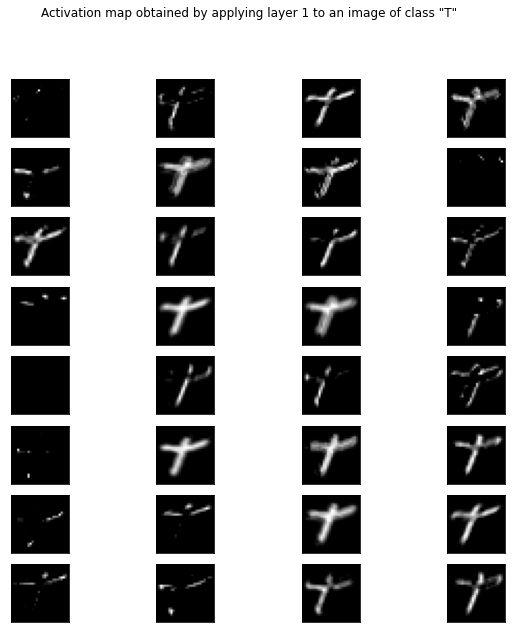

In [ ]:
import random
from keras.models import Model
from numpy import expand_dims

# Feature map obtained by applying first layer to a training example 
random_cls_index = random.sample(range(0,len(train_x)), 1)
image = train_x[random_cls_index]
new_model = Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = new_model.predict(image)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle(f'Activation map obtained by applying layer 1 to an image of class "{chr(classmap[train_y[random_cls_index].argmax(axis=1)[0]])}"')

idx = 1
for i in range(0,32):
    ax=fig.add_subplot(8,4,i+1)       
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(feature_maps[0, :, :, i], cmap=plt.get_cmap('gray'))
    idx+=1

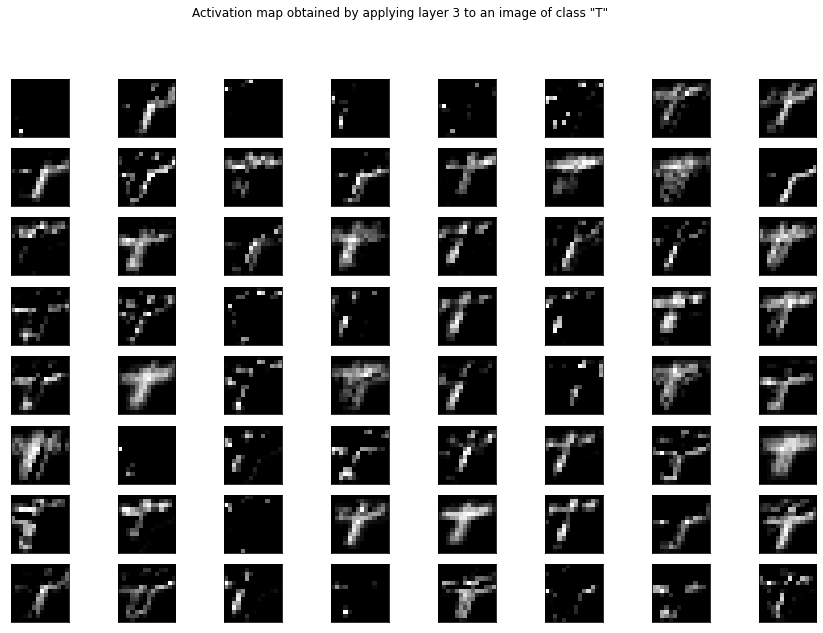

In [ ]:
# Feature map obtained by applying third layer to random training image
new_model = Model(inputs=model.inputs, outputs=model.layers[2].output)
feature_maps = new_model.predict(image)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle(f'Activation map obtained by applying layer 3 to an image of class "{chr(classmap[train_y[random_cls_index].argmax(axis=1)[0]])}"')

for i in range(0,64):
    ax=fig.add_subplot(8,8,i+1)       
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(feature_maps[0, :, :, i], cmap=plt.get_cmap('gray'))

In [ ]:
# Let's fit our model on the training data
# We will also use a validation set to test how well the model is generalizing
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
2468/2468 [==============================] - 119s 45ms/step - loss: 1.1353 - accuracy: 0.6734 - val_loss: 0.4904 - val_accuracy: 0.8319
Epoch 2/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.4070 - accuracy: 0.8603 - val_loss: 0.4295 - val_accuracy: 0.8476
Epoch 3/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.3450 - accuracy: 0.8776 - val_loss: 0.3931 - val_accuracy: 0.8619
Epoch 4/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.2899 - accuracy: 0.8921 - val_loss: 0.3719 - val_accuracy: 0.8682
Epoch 5/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.2530 - accuracy: 0.9031 - val_loss: 0.3898 - val_accuracy: 0.8673
Epoch 6/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.2213 - accuracy: 0.9133 - val_loss: 0.3981 - val_accuracy: 0.8638
Epoch 7/10
2468/2468 [==============================] - 108s 44ms/step - loss: 0.1989 - accuracy: 0.9205 - val_loss: 0

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Beez_innovations/assets


In [ ]:
# Saving model
 model.save("text_recognition_model.h5")

In [ ]:
# Plotting the training and validation error and accuracy for 10 epochs
def plot_fit_data(history, comment=""):
    x_labels = range(1,11)
    y_data_1 = history.history['loss']
    y_data_2 = history.history['val_loss']
    plt.subplot(1,2,1)
    plt.plot(x_labels, y_data_1, label = "Training error")
    plt.plot(x_labels, y_data_2, label = "Validation error")
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title("Training and validation error" + comment)
    plt.legend(loc='upper left')

    plt.subplot(1,2,2)
    y_data_1 = history.history['accuracy']
    y_data_2 = history.history['val_accuracy']
    plt.plot(x_labels, y_data_1, label = "Training accuracy")
    plt.plot(x_labels, y_data_2, label = "Validation accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title("Training and validation accuracy" + comment)
    plt.legend()
    fig = plt.gcf()
    fig.set_figwidth(15)
    fig.set_figheight(5)
    plt.show()

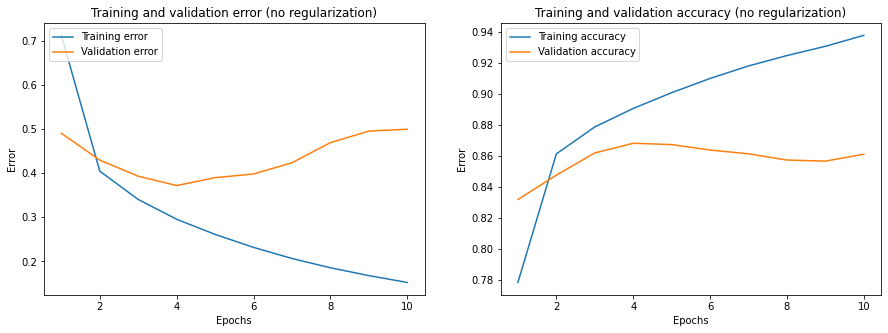

In [ ]:
# Plotting accuracy and error
plot_fit_data(history, " (no regularization)")

In [ ]:
def print_model_metrics(model, data, labels):
    loss_m, accuracy_m = model.evaluate(data, labels, verbose=0)
    print("Loss:", loss_m)
    print("Accuracy:", accuracy_m)
    print("-----------")

In [ ]:
from sklearn.metrics import classification_report
def print_classification_report(model, data, data_label, all_labels):
    predLables = model.predict(data)
    pred_classes = predLables.argmax(axis=1)
    act_classes = data_label.argmax(axis=1)
    print(classification_report(act_classes, pred_classes, target_names=all_labels))

In [ ]:
# Model evaluation on training data
print('Evaluating model on training data')
print_model_metrics(model, train_x, train_y)
print('Printing classification report on training data')
print_classification_report(model, train_x, train_y, labels)
print("-----------")

# Model evaluation on test data
print('Evaluating model on test data')
print_model_metrics(model, test_x, test_y)
print('Printing classification report on testing data')
print_classification_report(model, test_x, test_y, labels)
print("-----------")

Evaluating model on training data
Loss: 0.23706552386283875
Accuracy: 0.922029435634613
-----------
Printing classification report on training data
              precision    recall  f1-score   support

           0       0.70      0.80      0.75      2400
           1       0.57      0.87      0.68      2400
           2       0.97      0.94      0.95      2400
           3       0.98      0.99      0.99      2400
           4       0.98      0.95      0.96      2400
           5       0.97      0.92      0.94      2400
           6       0.93      0.98      0.95      2400
           7       0.99      0.98      0.99      2400
           8       0.96      0.98      0.97      2400
           9       0.83      0.83      0.83      2400
           A       0.98      0.97      0.98      2400
           B       0.97      0.98      0.98      2400
           C       0.98      0.98      0.98      2400
           D       0.96      0.97      0.97      2400
           E       0.98      0.99      0.

From the training and validation error plot, we see that validation loss reduces for an apic and then increases. This is an indication of overfitting. The model is doing really well on the training data. However, it is not able to generalize well. this is why we have a very high accuracy of 92% on the training data and lower accuracy of 86.3% on the test data. One way to address this is to include a dropout layer. Let's see how that works.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils

      
def build_model_with_dropout():
    model = Sequential()
    # Add a convolution layer with 32 filters
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))  
    model.add(MaxPooling2D(pool_size=2))
    # Add a second convolution layer
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))          
    model.add(MaxPooling2D(pool_size=2))        
    model.add(Flatten())
    # First fully connected layer with 128 units
    model.add(Dense(units=128, activation='relu'))
    # First dropout layer
    model.add(Dropout(.5))
    # Output layer with 47 units
    model.add(Dense(units=47, activation='softmax')) 
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
    return model

In [ ]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               401536    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [ ]:
history_with_dropout = model_with_dropout.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.3)

Epoch 1/10
2468/2468 [==============================] - 111s 44ms/step - loss: 1.6887 - accuracy: 0.5222 - val_loss: 0.4807 - val_accuracy: 0.8330
Epoch 2/10
2468/2468 [==============================] - 110s 44ms/step - loss: 0.6825 - accuracy: 0.7804 - val_loss: 0.4239 - val_accuracy: 0.8514
Epoch 3/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.5716 - accuracy: 0.8082 - val_loss: 0.3973 - val_accuracy: 0.8511
Epoch 4/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.5192 - accuracy: 0.8256 - val_loss: 0.3771 - val_accuracy: 0.8656
Epoch 5/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.4734 - accuracy: 0.8364 - val_loss: 0.3722 - val_accuracy: 0.8667
Epoch 6/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.4407 - accuracy: 0.8471 - val_loss: 0.3584 - val_accuracy: 0.8716
Epoch 7/10
2468/2468 [==============================] - 109s 44ms/step - loss: 0.4127 - accuracy: 0.8540 - val_loss: 0

In [ ]:
# Saving model
model_with_dropout.save("/content/drive/MyDrive/Beez_innovations/text_recognition_model_with_dropout.h5")

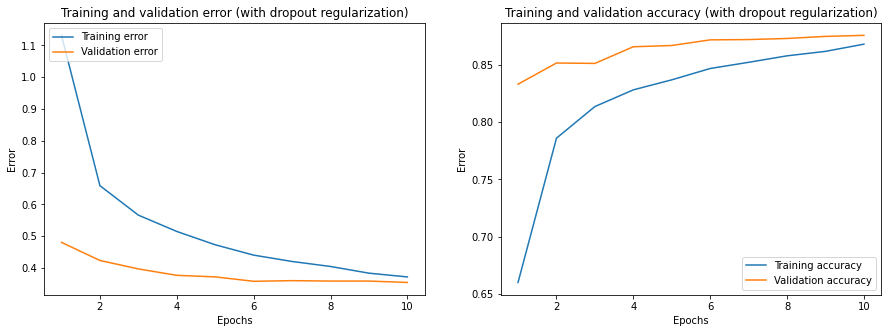

In [ ]:
# Plotting accuracy and error
plot_fit_data(history_with_dropout, " (with dropout regularization)")

In [ ]:
# Model evaluation on training data
print('Evaluating model on training data')
print_model_metrics(model_with_dropout, train_x, train_y)
print('Printing classification report on training data')
print_classification_report(model_with_dropout, train_x, train_y, labels)
print("-----------")
# Model evaluation on test data
print('Evaluating model on test data')
print_model_metrics(model_with_dropout, test_x, test_y)
print('Printing classification report on testing data')
print_classification_report(model_with_dropout, test_x, test_y, labels)
print("-----------")

Evaluating model on training data
Loss: 0.2618958652019501
Accuracy: 0.9027916789054871
-----------
Printing classification report on training data
              precision    recall  f1-score   support

           0       0.64      0.81      0.71      2400
           1       0.55      0.80      0.65      2400
           2       0.94      0.91      0.93      2400
           3       0.98      0.99      0.99      2400
           4       0.95      0.95      0.95      2400
           5       0.97      0.90      0.94      2400
           6       0.93      0.96      0.95      2400
           7       0.97      0.99      0.98      2400
           8       0.93      0.97      0.95      2400
           9       0.68      0.93      0.78      2400
           A       0.97      0.98      0.98      2400
           B       0.96      0.99      0.97      2400
           C       0.97      0.97      0.97      2400
           D       0.96      0.95      0.96      2400
           E       0.98      0.99      0.

**Parameter Tuning techniques**

In deep learning we can improve our model performance with algorithm tuning.here are some techniques.

1)Diagnostics:its mainly used for checking whether our model is underfit or overfit, here we evaluate it on the traing and validation dataset each epoch and plot the result.


2)weight initialization: weights are the actual parameters of our model, we should find the better set of weights that give good performance,


3)learning rate: we have large and small learning rate if we use small learning rate it will take more time and large learning rate will cause less time butlarger network need more training and the reverse, if we want to add more neurons or more layers we need to increase our learning rate.

4)activation funtion:we should use proper activation functions according to our model.

5)Batches and epoches:batch size defines the gradients and how often to update weight. and epoches is the entire traing data exposed to network.

6)Regularization: dropout is one of the techniques used to remove unused neurons.

7)optimization and loss: we should use proper methods.

8)earlystopping: it is also a type of regularization techniques. 